#explore the relationship between market sentiment and trader performance

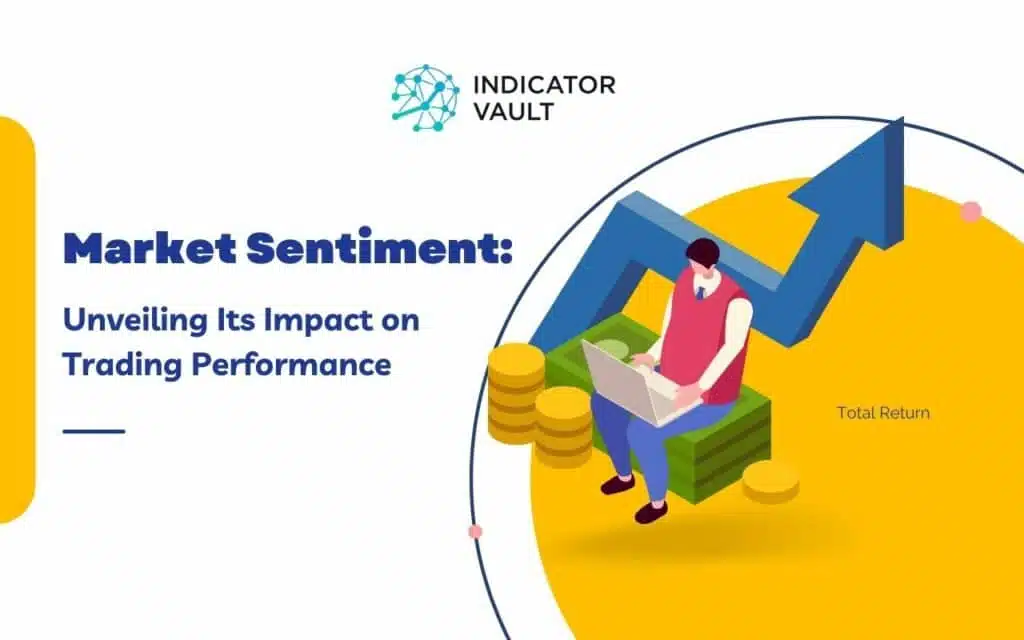##1. Project overview & goal
###explore the relationship between market sentiment  and trader performance .

In [ ]:
import numpy as np
import pandas as pd

###Load data

In [ ]:
# load
hist = pd.read_csv('/content/historical_data.csv')
sent = pd.read_csv('/content/fear_greed_index.csv')




###overview of data

In [ ]:
hist.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [ ]:
sent.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
hist.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
sent.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade_id          211224 non-null  float64
 15  timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


##Check the duplicate and null value

In [21]:
print(hist.duplicated().value_counts())
print(hist.isnull().value_counts())

False    211224
Name: count, dtype: int64
account  coin   execution_price  size_tokens  size_usd  side   timestamp_ist  start_position  direction  closed_pnl  transaction_hash  order_id  crossed  fee    trade_id  timestamp
False    False  False            False        False     False  False          False           False      False       False             False     False    False  False     False        211224
Name: count, dtype: int64


In [22]:
print(sent.duplicated().value_counts())
print(sent.isnull().value_counts())

False    2644
Name: count, dtype: int64
timestamp  value  classification  date 
False      False  False           False    2644
Name: count, dtype: int64


###So there is no duplicate and null value

##Data cleaning

In [24]:
sent.columns = sent.columns.str.strip().str.lower()  #set all the columns to lower format
hist.columns = hist.columns.str.strip().str.lower()

In [37]:
#convert daate columns to datetime format

sent['date']=pd.to_datetime(sent['date'],format='%Y-%m-%d',errors='coerce')
hist['timestamp_ist']=pd.to_datetime(hist['timestamp_ist'],format='%d-%m-%Y %H:%M',errors='coerce')

In [38]:

num_cols = ['execution_price', 'size_tokens', 'size_usd', 'closed_pnl', 'fee']
for col in num_cols:
    hist[col] = pd.to_numeric(hist[col], errors='coerce')

In [39]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           211224 non-null  object        
 1   coin              211224 non-null  object        
 2   execution_price   211224 non-null  float64       
 3   size_tokens       211224 non-null  float64       
 4   size_usd          211224 non-null  float64       
 5   side              211224 non-null  object        
 6   timestamp_ist     211224 non-null  datetime64[ns]
 7   start_position    211224 non-null  float64       
 8   direction         211224 non-null  object        
 9   closed_pnl        211224 non-null  float64       
 10  transaction_hash  211224 non-null  object        
 11  order_id          211224 non-null  int64         
 12  crossed           211224 non-null  bool          
 13  fee               211224 non-null  float64       
 14  trad

In [40]:
# extract date from Historical data
hist['date'] = hist['timestamp_ist'].dt.date
hist['date'] = pd.to_datetime(hist['date'])

In [42]:
# Merge on date
merged = pd.merge(hist, sent[['date', 'value', 'classification']], on='date', how='left')

print("\nMerged Data Sample:\n", merged.head())


Merged Data Sample:
                                       account  coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   size_tokens  size_usd side       timestamp_ist  start_position direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   closed_pnl                                   transaction_hash     o

##Exploratory Data Analysis

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-1277122541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=merged, order=merged['classification'].value_counts().index, palette='coolwarm')


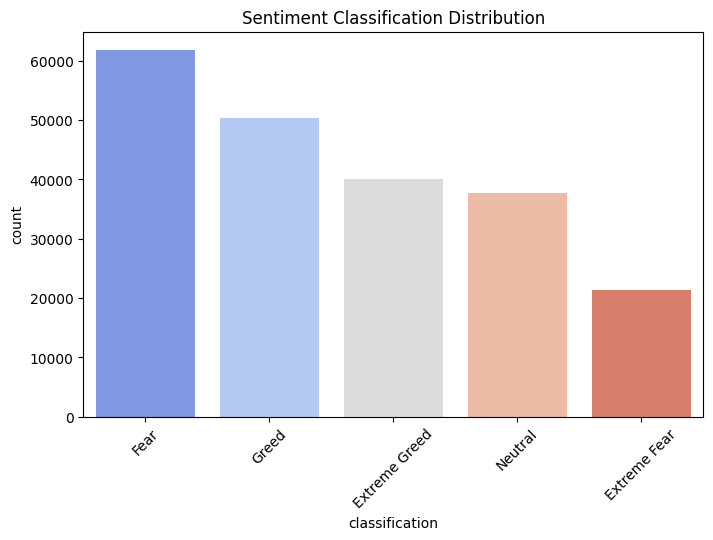

In [45]:
#sentiment classification distribution

plt.figure(figsize=(8,5))
sns.countplot(x='classification', data=merged, order=merged['classification'].value_counts().index, palette='coolwarm')
plt.title("Sentiment Classification Distribution")
plt.xticks(rotation=45)
plt.show()

#Sentiment Classification Distribution
1 ."Fear" is the most common sentiment in trades, with the highest count.

2 ."Greed" is the second most frequent sentiment.

3."Extreme Greed" and "Neutral" have moderate frequencies—less than "Fear" or "Greed" but more than "Extreme Fear."

4."Extreme Fear" appears least often, with the lowest count.

5.Overall, positive (greed-oriented) and negative (fear-oriented) sentiments dominate over neutral, with a slight bias toward negative (fear) sentiment.

/tmp/ipython-input-1596102727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='viridis')


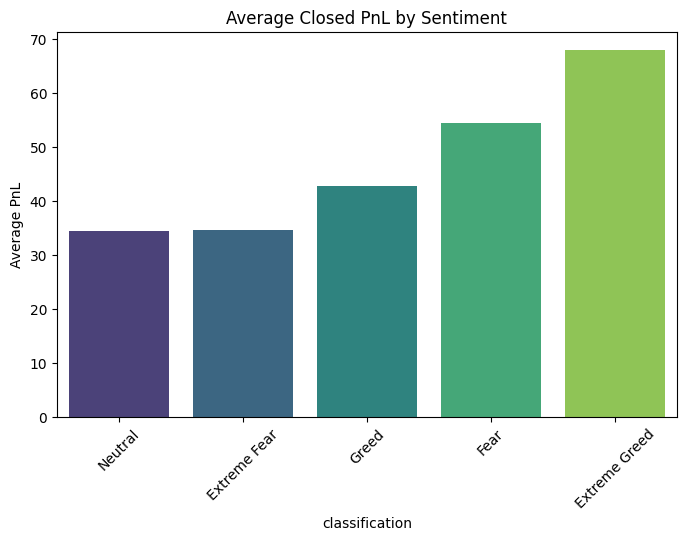

In [46]:
# Average Closed PnL by Sentiment
plt.figure(figsize=(8,5))
avg_pnl = merged.groupby('classification')['closed_pnl'].mean().sort_values()
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='viridis')
plt.title("Average Closed PnL by Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average PnL")
plt.show()

#Average Closed PnL by Sentiment
1."Extreme Greed" produces the highest average closed PnL, suggesting more profitable trades.

2."Fear" and "Greed" both yield strong average PnL, but less than "Extreme Greed."

3."Neutral" and "Extreme Fear" produce the lowest average closed PnL—poorer profitability.

4.The most profitable trades on average happen in "Extreme Greed" sentiment.

5.Negative/neutral sentiments may correlate with more conservative or less effective trading outcomes.

/tmp/ipython-input-62544929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_vol.index, y=trade_vol.values, palette='magma')


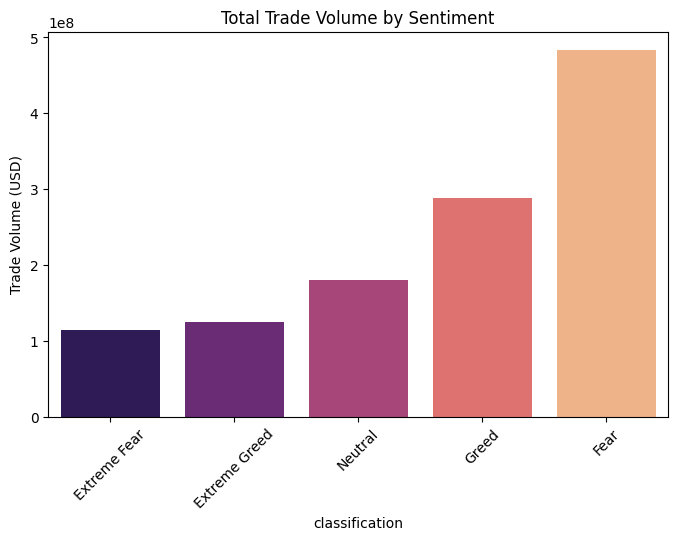

In [47]:
# Trade Volume by Sentiment
plt.figure(figsize=(8,5))
trade_vol = merged.groupby('classification')['size_usd'].sum().sort_values()
sns.barplot(x=trade_vol.index, y=trade_vol.values, palette='magma')
plt.title("Total Trade Volume by Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Trade Volume (USD)")
plt.show()

## Total Trade Volume by Sentiment

1.Trades executed under "Fear" sentiment have the highest total trade volume (in USD).

2."Greed" also leads to substantial trade volume, but less than "Fear."

3."Neutral" trades have a moderate total volume, between both extremes.

4."Extreme Greed" and "Extreme Fear" sentiments are associated with much lower total volumes.

5.The larger trade volumes tend to occur when the market is driven by "Fear" or "Greed," rather than in extreme or neutral conditions.

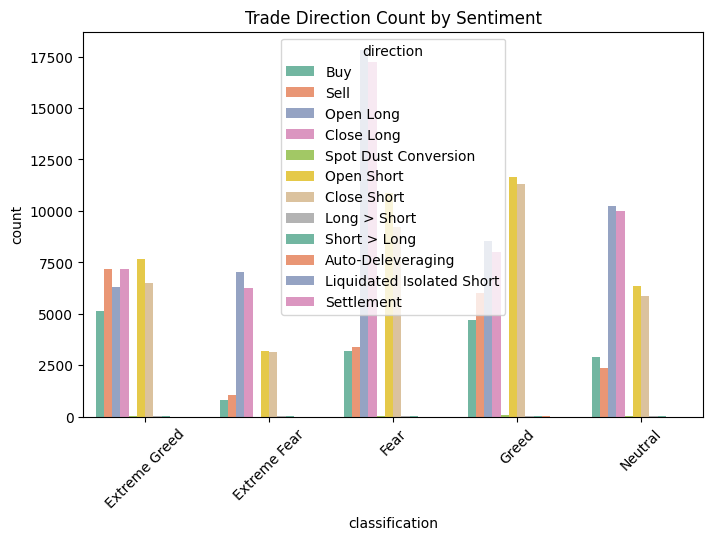

In [49]:
# Direction vs Sentiment

plt.figure(figsize=(8,5))
sns.countplot(x='classification', hue='direction', data=merged, palette='Set2')
plt.title("Trade Direction Count by Sentiment")
plt.xticks(rotation=45)
plt.show()

#Trade Direction Count by Sentiment
1.Trade activity peaks in "Greed" and "Fear" sentiment periods—these segments show the highest counts for most trade directions.

2."Extreme Greed" and "Extreme Fear" are less common and have lower overall trade counts compared to regular Greed/Fear.

3.All types of trades (Buy, Sell, Long, Short, etc.) are distributed across sentiments, but with clear volume differences.

4."Neutral" sentiment sees moderate trade activity, neither the highest nor lowest among classifications.

5.Spot Dust Conversion and Settlement actions occur in all sentiment classes, with higher counts in emotionally charged periods.


Correlation between Sentiment Value and Closed PnL:
                value  closed_pnl
value       1.000000    0.008121
closed_pnl  0.008121    1.000000


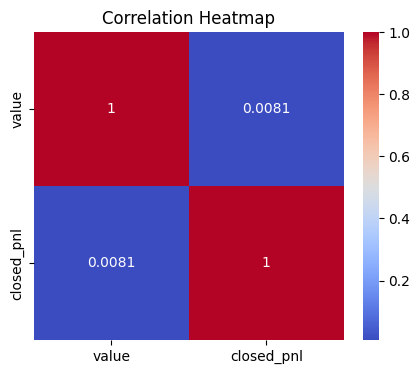

In [50]:
# Correlation Analysis

corr = merged[['value', 'closed_pnl']].corr()
print("\nCorrelation between Sentiment Value and Closed PnL:\n", corr)

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##Correlation Between Sentiment Value and Closed PnL
1.The correlation coefficient between sentiment value and closed PnL is very low (~0.008)—they are essentially uncorrelated.

2.Changes in sentiment value do not reliably predict trading profitability.

3.Both variables (sentiment value and closed PnL) behave independently in this dataset.

4.The diagonal values on the heatmap indicate perfect self-correlation, as expected.

5.Using sentiment as a predictor for trade PnL is ineffective based on this analysis.

In [51]:

merged.to_csv("merged_trading_sentiment.csv", index=False)
print("\nCleaned & merged dataset saved as 'merged_trading_sentiment.csv'")



Cleaned & merged dataset saved as 'merged_trading_sentiment.csv'


#Final Summary
1.Fear is the most common sentiment, followed by Greed; extreme sentiments are rare.

2.Highest trade volumes occur in Fear and Greed; extreme sentiments see lower volumes.

3.Trade activity peaks in emotionally charged markets (Fear/Greed), moderate in Neutral.

4.Extreme Greed sentiment gives the highest average profitability; Neutral & Extreme Fear are least profitable.

5.Correlation between sentiment value and PnL is negligible (~0.008) → sentiment alone can’t predict profits.



#Next Steps for Improvement
1.Add more market data (volatility, BTC trend, funding rates).

2.Build predictive models (Random Forest, XGBoost) to forecast profitability.

3.Feature engineering with sentiment trends & lag values.

4.Use tools: scikit-learn, statsmodels, Prophet, SHAP/LIME for analysis & explainability.